# AI-Medic Internship

### Homayoon Alimohammadi - August 2nd 2021


In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('./dataR2.csv')
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


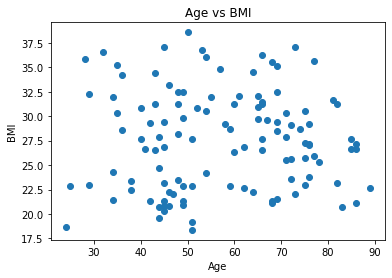

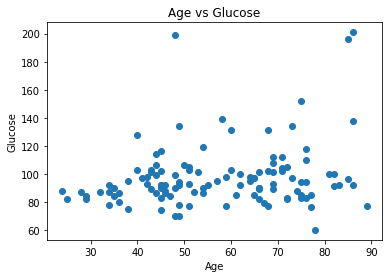

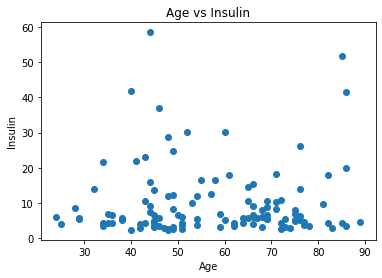

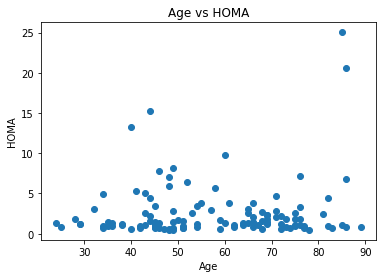

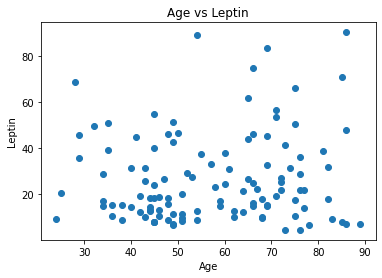

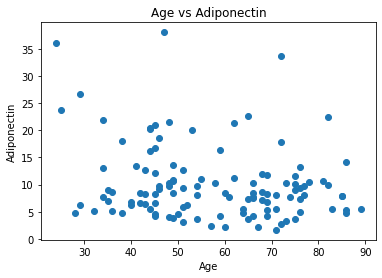

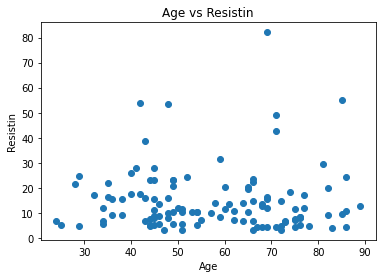

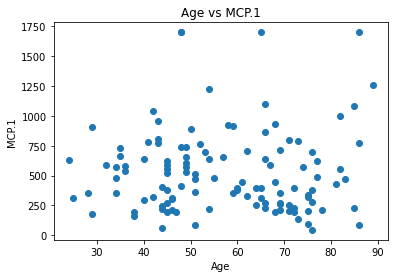

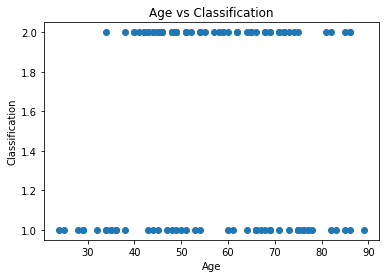

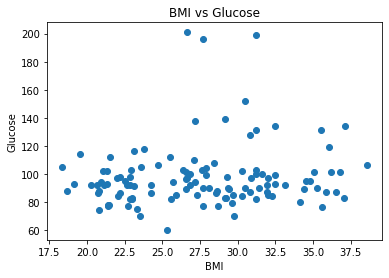

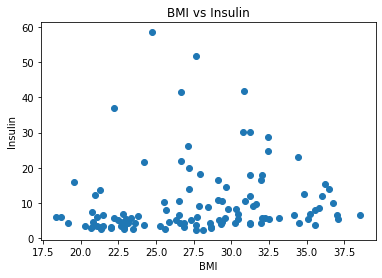

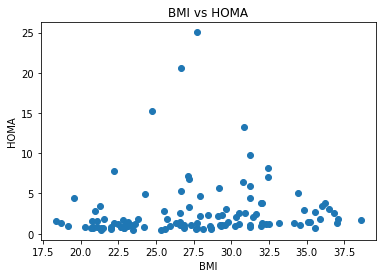

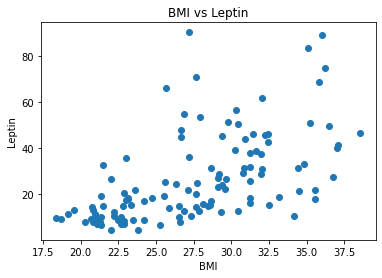

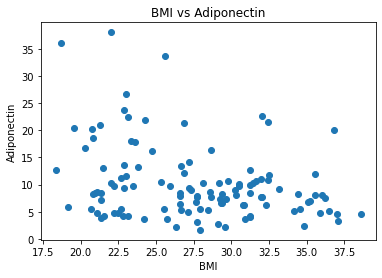

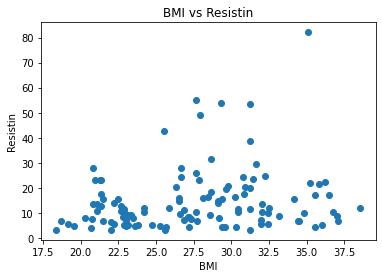

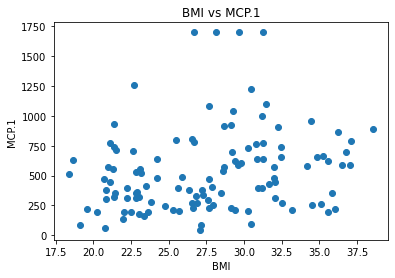

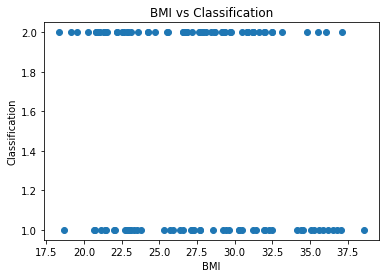

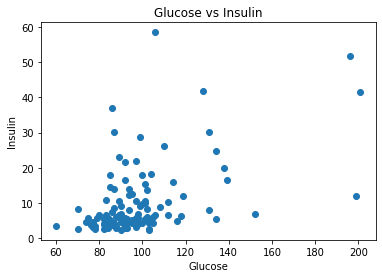

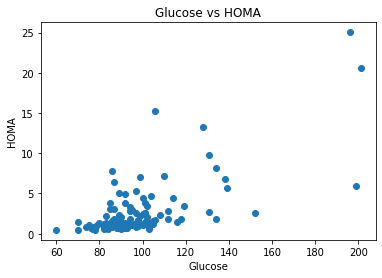

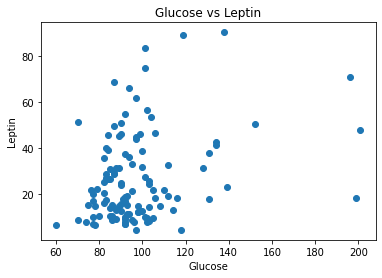

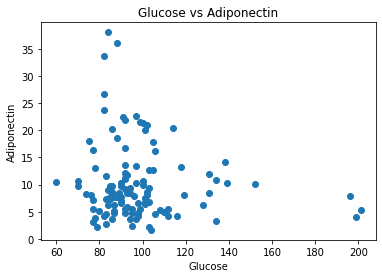

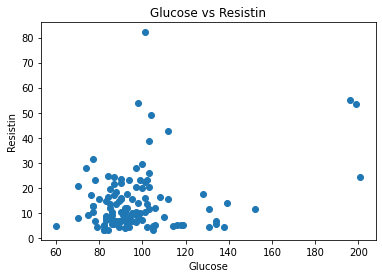

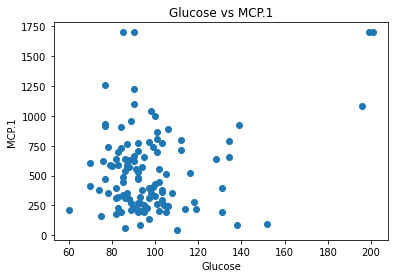

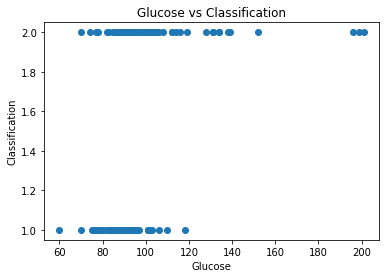

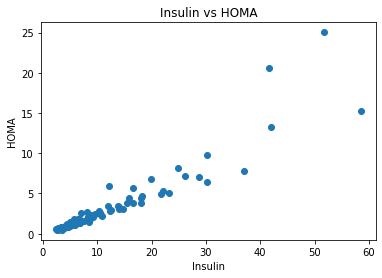

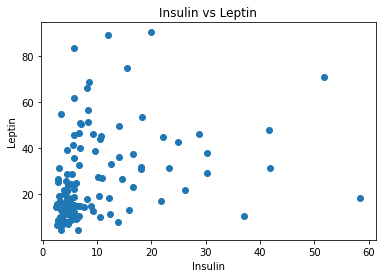

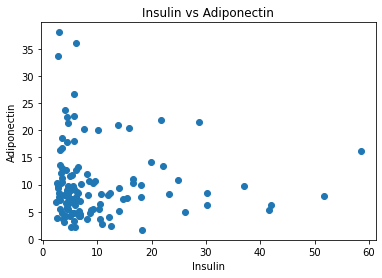

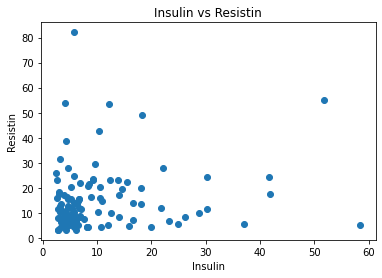

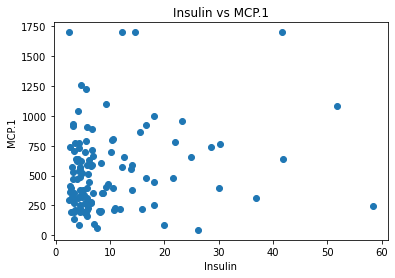

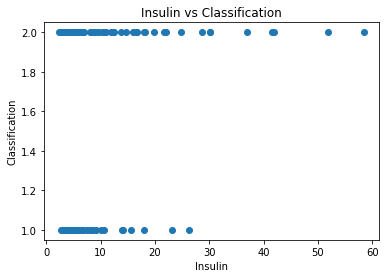

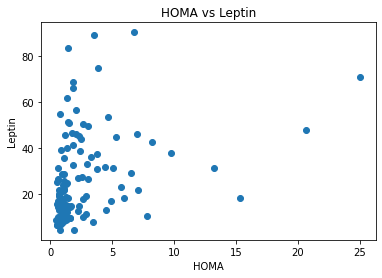

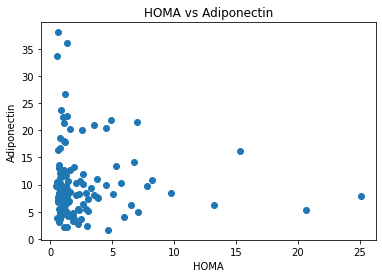

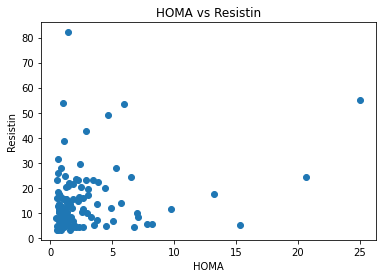

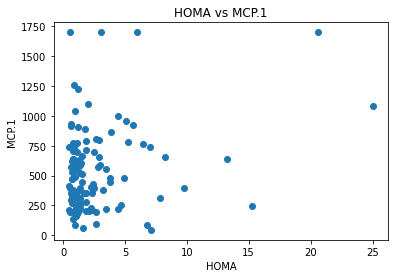

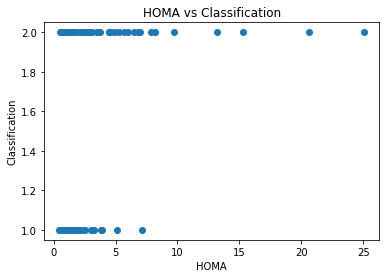

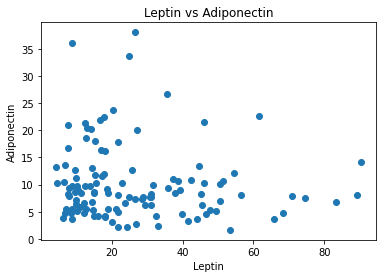

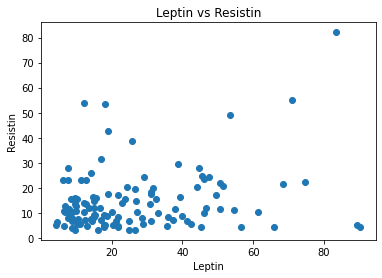

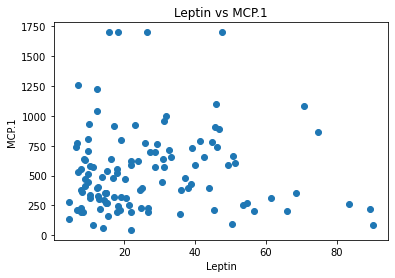

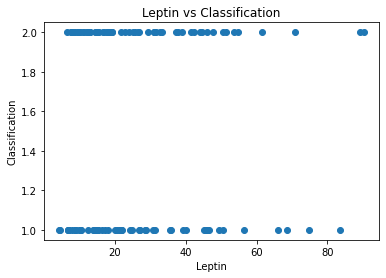

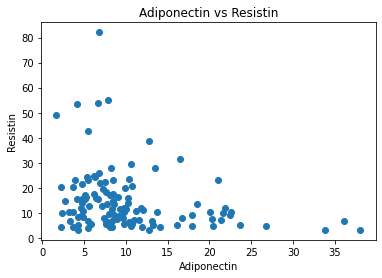

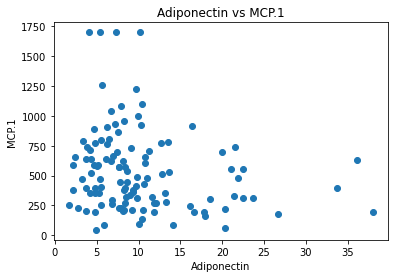

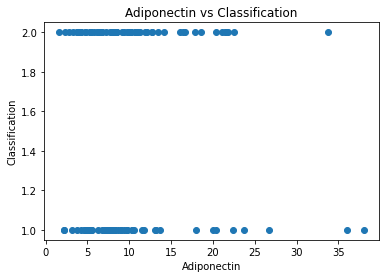

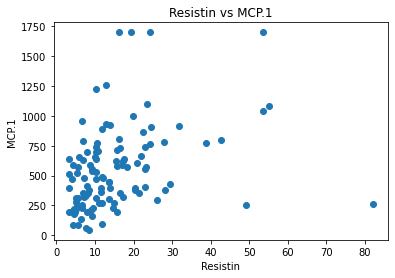

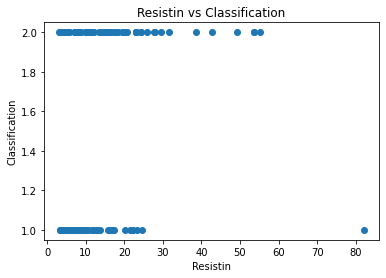

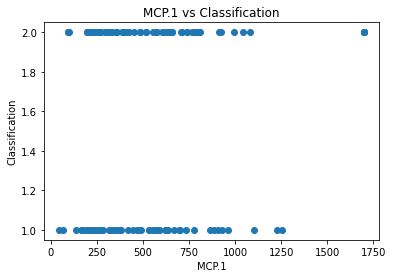

In [192]:
cols = list(data.columns)
for i in range(len(cols)):
    for j in range(i,len(cols)):
        if cols[i] == cols[j]:
            continue
        x1 = data[cols[i]]
        x2 = data[cols[j]]
        plt.figure()
        plt.scatter(x1,x2)
        plt.xlabel(cols[i])
        plt.ylabel(cols[j])
        plt.title(cols[i]+" vs "+cols[j])


In [193]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [195]:
corr = data.corr()
corr

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


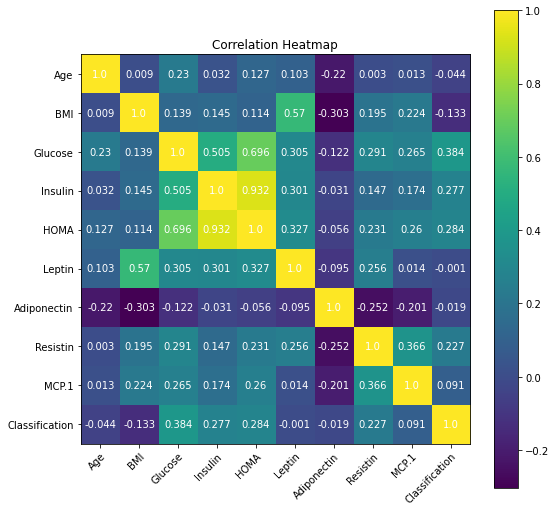

In [196]:
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(corr)

# We want to show all ticks...
ax.set_xticks(np.arange(len(cols)))
ax.set_yticks(np.arange(len(cols)))
# ... and label them with the respective list entries
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cols)):
    for j in range(len(cols)):
        text = ax.text(j, i, round(corr.iloc[i,j],3),
                       ha="center", va="center", color="w")

ax.set_title("Correlation Heatmap")
fig.tight_layout()
ax.figure.colorbar(im)
plt.show()

In [197]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if not columns[i] or not columns[j]:
                continue
            sum_i = 0
            sum_j = 0
            for k in range(corr.shape[0]):
                sum_i += corr.iloc[i,k]
                sum_j += corr.iloc[j,k]
            print(cols[i], sum_i)
            print(cols[j], sum_j)
            if sum_i >= sum_j:
                print(f'{cols[j]} got deleted')
                columns[j] = False
            else:
                print(f'{cols[i]} got deleted')
                columns[i] = False
                
selected_columns = data.columns[columns]
selected_columns

Insulin 3.4826974907710566
HOMA 3.9154376946844907
Insulin got deleted


Index(['Age', 'BMI', 'Glucose', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin',
       'MCP.1', 'Classification'],
      dtype='object')

In [198]:
data_selected = data[selected_columns]
data_selected

,Age,BMI,Glucose,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,0.570392,24.9600,33.750000,3.27000,392.460,2


In [199]:
data_selected.Classification = data_selected.Classification.map(lambda x: x-1)
data_selected

,Age,BMI,Glucose,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,0.805386,6.6994,4.819240,10.57635,773.920,0
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,0.755688,54.6800,12.100000,10.96000,268.230,1
112,62,26.840000,100,1.117400,12.4500,21.420000,7.32000,330.160,1
113,65,32.050000,97,1.370998,61.4800,22.540000,10.33000,314.050,1
114,72,25.590000,82,0.570392,24.9600,33.750000,3.27000,392.460,1


In [200]:
from sklearn.linear_model import LogisticRegression
X = data_selected.drop(columns='Classification')
y = data_selected['Classification']
X = X.to_numpy()

In [201]:
# z-score normalization
# X = (X - X.mean(axis=0)) / (X.std(axis=0))

# min-max normalization
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))


In [202]:
model = LogisticRegression()
model.fit(X,y)
model.score(X,y)

shuffle = True
random_state = 4
best_train_score = {'LR':0, 'SVC':0, 'KNN':0, 'DT':0, 'XGB':0}
best_val_score = {'LR':0, 'SVC':0, 'KNN':0, 'DT':0, 'XGB':0}

In [203]:
from sklearn.model_selection import train_test_split, KFold

train_score = 0
val_score = 0

s = KFold(n_splits=5, shuffle=shuffle, random_state=random_state)
for z in s.split(X, y):
    train_x = X[z[0]]
    train_y = y[z[0]]
    
    val_x = X[z[1]]
    val_y = y[z[1]]
    
    clf = LogisticRegression()
    clf.fit(train_x, train_y)
    
    train_score += clf.score(train_x, train_y)
    val_score += clf.score(val_x, val_y)
    
    
    
print(train_score / 5)
print(val_score / 5)
if train_score / 5 >= best_train_score['LR']:
    best_train_score['LR'] = train_score / 5
if val_score / 5 >= best_val_score['LR']:
    best_val_score['LR'] = val_score / 5

0.7326320710612437
0.6822463768115942


In [204]:
from sklearn.preprocessing import PolynomialFeatures

for p in [1, 2, 3, 4, 5,6,7,8]:
    X_poly = PolynomialFeatures(degree=p).fit_transform(X)
    
    train_score = 0
    val_score = 0

    s = KFold(n_splits=5, shuffle=shuffle, random_state=random_state)
    for z in s.split(X_poly, y):
        train_x = X_poly[z[0]]
        train_y = y[z[0]]

        val_x = X_poly[z[1]]
        val_y = y[z[1]]

        clf = LogisticRegression(max_iter=1000)
        clf.fit(train_x, train_y)

        train_score += clf.score(train_x, train_y)
        val_score += clf.score(val_x, val_y)


    print(p)
    print(train_score / 5)
    print(val_score / 5)
    print('--------------')
    if train_score / 5 >= best_train_score['LR']:
        best_train_score['LR'] = train_score / 5
    if val_score / 5 >= best_val_score['LR']:
        best_val_score['LR'] = val_score / 5

1
0.7326320710612437
0.6822463768115942
--------------
2
0.7865591397849464
0.6909420289855073
--------------
3
0.8146096306685366
0.707608695652174
--------------
4
0.8275596072931277
0.716304347826087
--------------
5
0.834034595605423
0.716304347826087
--------------
6
0.834034595605423
0.6992753623188406
--------------
7
0.8275829827021972
0.6992753623188406
--------------
8
0.8383590462833099
0.6818840579710146
--------------


In [205]:
X_poly = PolynomialFeatures(degree=7).fit_transform(X)

for c in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    train_score = 0
    val_score = 0
    s = KFold(n_splits=5, shuffle=shuffle, random_state=random_state)
    
    for z in s.split(X, y):
        train_x = X_poly[z[0]]
        train_y = y[z[0]]

        val_x = X_poly[z[1]]
        val_y = y[z[1]]

        clf = LogisticRegression(C=c)
        clf.fit(train_x, train_y)

        train_score += clf.score(train_x, train_y)
        val_score += clf.score(val_x, val_y)
    
    
    print('C = ', c)
    print(train_score / 5)
    print(val_score / 5)
    print('------------------')
    if train_score / 5 >= best_train_score['LR']:
        best_train_score['LR'] = train_score / 5
    if val_score / 5 >= best_val_score['LR']:
        best_val_score['LR'] = val_score / 5

C =  0.0001
0.5517999064983636
0.5528985507246377
------------------
C =  0.001
0.5517999064983636
0.5528985507246377
------------------
C =  0.01
0.5625525946704066
0.5528985507246377
------------------
C =  0.1
0.7089527816736794
0.6731884057971015
------------------
C =  1
0.8275829827021972
0.6992753623188406
------------------
C =  10
0.91369798971482
0.7253623188405797
------------------
C =  100
0.9611500701262272
0.7844202898550725
------------------
C =  1000
0.9784712482468443
0.7405797101449275
------------------


In [206]:
p = 4
c = 100
X_poly = PolynomialFeatures(degree=p).fit_transform(X)
    
train_score = 0
val_score = 0

s = KFold(n_splits=5, shuffle=shuffle, random_state=random_state)
for z in s.split(X_poly, y):
    train_x = X_poly[z[0]]
    train_y = y[z[0]]

    val_x = X_poly[z[1]]
    val_y = y[z[1]]

    clf = LogisticRegression(C=c,max_iter=1000)
    clf.fit(train_x, train_y)

    train_score += clf.score(train_x, train_y)
    val_score += clf.score(val_x, val_y)


print('P',p)
print('C',c)
# print('Penalty','l1')
# print('Solver','liblinear')
print(train_score / 5)
print(val_score / 5)
if train_score / 5 >= best_train_score['LR']:
    best_train_score['LR'] = train_score / 5
if val_score / 5 >= best_val_score['LR']:
    best_val_score['LR'] = val_score / 5

P 4
C 100
0.9482468443197757
0.7590579710144928


In [207]:
from sklearn.svm import SVC

p = 4
c = 100
X_poly = PolynomialFeatures(degree=p).fit_transform(X)


kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    train_score = 0
    val_score = 0

    s = KFold(n_splits=5, shuffle=shuffle, random_state=random_state)
    for z in s.split(X, y):
        train_x = X[z[0]]
        train_y = y[z[0]]

        val_x = X[z[1]]
        val_y = y[z[1]]

        clf = SVC(kernel=kernel)
        clf.fit(train_x, train_y)

        train_score += clf.score(train_x, train_y)
        val_score += clf.score(val_x, val_y)


#     print('P',p)
#     print('C',c)
    # print('Penalty','l1')
    # print('Solver','liblinear')
    print('Kernel', kernel)
    print(train_score / 5)
    print(val_score / 5)
    print('---------')
    if train_score / 5 >= best_train_score['SVC']:
        best_train_score['SVC'] = train_score / 5
    if val_score / 5 >= best_val_score['SVC']:
        best_val_score['SVC'] = val_score / 5

Kernel linear
0.7305282842449744
0.6905797101449275
---------
Kernel poly
0.8729079008882655
0.691304347826087
---------
Kernel rbf
0.894319775596073
0.6992753623188406
---------
Kernel sigmoid
0.5388499298737728
0.5010869565217391
---------


In [208]:
from sklearn.tree import DecisionTreeClassifier as DT

p = 4
c = 100
X_poly = PolynomialFeatures(degree=p).fit_transform(X)
    

train_score = 0
val_score = 0

s = KFold(n_splits=5, shuffle=shuffle, random_state=random_state)
for z in s.split(X, y):
    train_x = X[z[0]]
    train_y = y[z[0]]

    val_x = X[z[1]]
    val_y = y[z[1]]

    clf = DT()
    clf.fit(train_x, train_y)

    train_score += clf.score(train_x, train_y)
    val_score += clf.score(val_x, val_y)


#     print('P',p)
#     print('C',c)
# print('Penalty','l1')
# print('Solver','liblinear')
# print('Kernel', kernel)
print(train_score / 5)
print(val_score / 5)
print('---------')
if train_score / 5 >= best_train_score['DT']:
    best_train_score['DT'] = train_score / 5
if val_score / 5 >= best_val_score['DT']:
    best_val_score['DT'] = val_score / 5

1.0
0.7594202898550725
---------


In [209]:
from sklearn.neighbors import KNeighborsClassifier as KNN

p = 3
c = 100
X_poly = PolynomialFeatures(degree=p).fit_transform(X)
    

for n in range(1,15):
    train_score = 0
    val_score = 0

    s = KFold(n_splits=5, shuffle=shuffle, random_state=random_state)
    for z in s.split(X_poly, y):
        train_x = X_poly[z[0]]
        train_y = y[z[0]]

        val_x = X_poly[z[1]]
        val_y = y[z[1]]

        clf = KNN(n_neighbors=n)
        clf.fit(train_x, train_y)

        train_score += clf.score(train_x, train_y)
        val_score += clf.score(val_x, val_y)


    #     print('P',p)
    #     print('C',c)
    # print('Penalty','l1')
    # print('Solver','liblinear')
    # print('Kernel', kernel)
    print('Neighbors', n)
    print(train_score / 5)
    print(val_score / 5)
    print('---------')
    if train_score / 5 >= best_train_score['KNN']:
        best_train_score['KNN'] = train_score / 5
    if val_score / 5 >= best_val_score['KNN']:
        best_val_score['KNN'] = val_score / 5

Neighbors 1
1.0
0.6485507246376812
---------
Neighbors 2
0.8018466573165031
0.6467391304347826
---------
Neighbors 3
0.8577372604020571
0.6992753623188406
---------
Neighbors 4
0.8017064048620851
0.6637681159420289
---------
Neighbors 5
0.8491351098644226
0.7072463768115942
---------
Neighbors 6
0.8124824684431978
0.6641304347826087
---------
Neighbors 7
0.8037634408602152
0.6905797101449276
---------
Neighbors 8
0.782258064516129
0.6481884057971015
---------
Neighbors 9
0.7823281907433381
0.6644927536231884
---------
Neighbors 10
0.771505376344086
0.6648550724637681
---------
Neighbors 11
0.7499532491818608
0.6387681159420289
---------
Neighbors 12
0.7435250116877047
0.6568840579710146
---------
Neighbors 13
0.7328190743338009
0.6043478260869566
---------
Neighbors 14
0.7349462365591398
0.6043478260869566
---------


In [210]:
from xgboost import XGBClassifier as XGB

p = 1
c = 100
X_poly = PolynomialFeatures(degree=p).fit_transform(X)


train_score = 0
val_score = 0

s = KFold(n_splits=5, shuffle=shuffle, random_state=random_state)
for z in s.split(X, y):
    train_x = X[z[0]]
    train_y = y[z[0]]

    val_x = X[z[1]]
    val_y = y[z[1]]

    clf = XGB(verbosity=0)
    clf.fit(train_x, train_y)

    train_score += clf.score(train_x, train_y)
    val_score += clf.score(val_x, val_y)


#     print('P',p)
#     print('C',c)
# print('Penalty','l1')
# print('Solver','liblinear')
# print('Kernel', kernel)
# print('Neighbors', n)
print(train_score / 5)
print(val_score / 5)
print('---------')
if train_score / 5 >= best_train_score['XGB']:
    best_train_score['XGB'] = train_score / 5
if val_score / 5 >= best_val_score['XGB']:
    best_val_score['XGB'] = val_score / 5

1.0
0.7333333333333333
---------


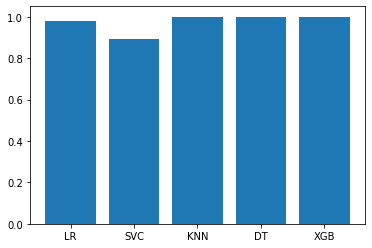

In [211]:
plt.bar(best_train_score.keys(), best_train_score.values())
plt.show()

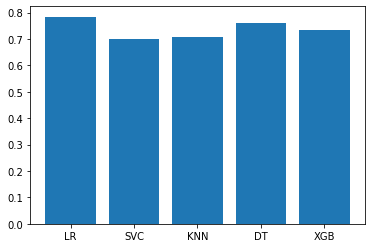

Best Validation Score is 0.7844202898550725, Achieved by: LR


In [212]:
plt.bar(best_val_score.keys(), best_val_score.values())
plt.show()
best_score = sorted(best_val_score.values())[-1]
best_clf = [i for i,j in best_val_score.items() if j == best_score]
print(f'Best Validation Score is {best_score}, Achieved by: {best_clf[0]}')